# <a id='intro'>1. Contexto</a>  

Avito é um site de marketplace com a maior quantidade de anúncios classificados da Rússia.

O desafio é prever a demanda por um anúncio online com base em sua descrição completa (título, descrição, imagens, etc.), seu contexto (geograficamente onde foi postado, anúncios semelhantes já postados) e a demanda histórica por anúncios semelhantes em contextos semelhantes.

Desta forma, será possível informar os vendedores sobre a melhor forma de otimizar suas postagens e fornecer alguma indicação de quais itens são mais relevantes para o consumidor ao se considerar realizar uma compra efetiva no site de anúncios.

[Yandex Translate](https://translate.yandex.com/?lang=ru-en&text=Челябинск) para tradução de textos.

# Sumário

- <a href='#intro'>1. Contexto</a>
    - <a href='#ll'>1.1 Libs</a>
- <a href='#rtd'>2. Datasets</a>
     - <a href='#rrtd'>2.1 Importação dos dados</a>
     - <a href='#oot'>2.2 Visualização do dataset</a>
- <a href='#god'>3. Informações</a>
     - <a href='#sootd'>3.1 Informaçoes estatísticas</a>
     - <a href='#cfmd'>3.2 Valores Faltantes</a>
     - <a href='#cftte'>3.3 Valores únicos</a>
     - <a href='#cfmde'>3.4 Manipulação do dataset</a>     
- <a href='#de'>4. Visualização dos dados</a>
     - <a href='#hadodp'>4.1 Histograma e distribuição da probabilidade de negócio</a>
     - <a href='#hadoap'>4.2 Classes de probabilidade de negócio</a>     
     - <a href='#hadoapi'>4.3 Histograma e distribuição do preço</a>     
     - <a href='#hadoapp'>4.4 Probabilidade de negócio em função do preço</a>     
     - <a href='#dodar'>4.5 Distribuição de itens por região</a>     
     - <a href='#dodari'>4.6 Distribuição de itens por cidade</a>
     - <a href='#dodara'>4.7 Probabilidade de negócio por região</a>
     - <a href='#dodare'>4.8 Distribuição de itens por categoria principal</a>
     - <a href='#dodai'>4.9 Probabilidade de negócio por categoria</a>
     - <a href='#dodao'>4.10 Distribuição de itens por categoria</a>
     - <a href='#dodart'>4.11 Distribuição do tipo de usuário</a>     
     - <a href='#doday'>4.12 Distribuição dos parâmetros 1, 2 e 3</a>     
- <a href='#t'>5. Série Temporal</a>
    - <a href='#fodsbdir'>5.1  Data de ativação nos dados de treino e teste</a>
    - <a href='#fodsbdit'>5.2  Distribuição da data de ativação</a>
    - <a href='#fodsbdiy'>5.3 Período de postagem de um Ad</a>
    - <a href='#fodsbdiu'>5.4  Tendência da variável preço</a> 
        - <a href='#paetsd'>5.4.1 Média do preço a cada dia</a>
        - <a href='#paetsdt'>5.4.2 Média do preço a cada dois dias</a>
        - <a href='#paetsdyu'>5.4.3 Probabilidade de negócio a cada dois dias</a>
        - <a href='#paetsdee'>5.4.4 Probabilidade de negócio a cada dois dias</a>
        - <a href='#tnodawdjshhs'>5.4.5 Período de exibição dos Ads</a>
    - <a href='#totar'>5.5 Comportamento da variáveis textuais</a>
        - <a href='#tnoda'>5.5.1 Variável descrição</a>
        - <a href='#tnodss'>5.5.2 Variável título</a>   
- <a href='#tr'>6. Feature Engineering</a>    
    - <a href='#5-15-1'>6.1 Features das séries temporais </a>
    - <a href='#5-15-2'>6.2 Featrues das variáveis textuais</a>
    - <a href='#5-15-3'>6.3 Conversão de featues categóricas para numéricas</a>
    - <a href='#5-15-4'>6.4 Exclusão de features</a>
- <a href='#7'>7 Análise Multivariada</a>
    - <a href='#7-1'>7.1 Correlação de Pearson</a>
    - <a href='#7-2'>7.2 Venn Diagram</a>
- <a href='#bsc'>8 Síntese</a>

## <a id='ll'>1.1 Libs</a>

In [2]:
import pandas as pd
import numpy as np 
from numpy import array

# Data viz
from plotly import tools
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt 
from matplotlib_venn import venn2
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
#from mpl_toolkits.basemap import Basemap

from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import datetime as dt
import warnings
import string
import time

# stop_words = []
import nltk
#nltk.download('stopwords')
stop_words = list(set(stopwords.words('russian')))
warnings.filterwarnings('ignore')
punctuation = string.punctuation

# Plotting Decision tree
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
import gc

import pydot
import emoji
from googletrans import Translator

import translate

# <a id='rtd'>2. Datasets</a>

## <a id='rrtd'>2.1 Importação dos dados</a>

In [3]:
print("Leitura......")
#periods_test = pd.read_csv('../data/periods_test.csv', parse_dates=["activation_date", "date_from", "date_to"], nrows=1000)
periods_train = pd.read_csv('../data/periods_train.csv', parse_dates=["activation_date", "date_from", "date_to"], nrows=1000)
#test = pd.read_csv('../data/test.csv', nrows=1000)
train = pd.read_csv('../data/train.csv', nrows=1000)
print("Ok....")
# train_active = pd.read_csv('../input/train_active.csv')
# test_active = pd.read_csv('../input/test_active.csv')

Leitura......
Ok....


In [4]:
print("train data: ", train.shape)
#print("test data: ", test.shape)
print("periods_train: ", periods_train.shape)
#print("periods_test: ", periods_test.shape)

train data:  (1000, 18)
periods_train:  (1000, 4)


## <a id='oot'>2.2 Visualização do dataset</a>

**train data**

In [5]:
train.head(3)

item_id       user_id                region            city  \
0  b912c3c6a6ad  e00f8ff2eaf9  Свердловская область    Екатеринбург   
1  2dac0150717d  39aeb48f0017     Самарская область          Самара   
2  ba83aefab5dc  91e2f88dd6e3    Ростовская область  Ростов-на-Дону   

  parent_category_name               category_name  \
0          Личные вещи  Товары для детей и игрушки   
1      Для дома и дачи           Мебель и интерьер   
2  Бытовая электроника               Аудио и видео   

                       param_1 param_2 param_3                  title  \
0    Постельные принадлежности     NaN     NaN  Кокоби(кокон для сна)   
1                       Другое     NaN     NaN      Стойка для Одежды   
2  Видео, DVD и Blu-ray плееры     NaN     NaN         Philips bluray   

                                         description   price  item_seq_number  \
0  Кокон для сна малыша,пользовались меньше месяц...   400.0                2   
1          Стойка для одежды, под вешалки. С бутика.  3000.0               19   
2  В хорошем состоянии, домашний кинотеатр с blu ...  4000.0                9   

  activation_date user_type  \
0      2017-03-28   Private   
1      2017-03-26   Private   
2      2017-03-20   Private   

                                               image  image_top_1  \
0  d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...       1008.0   
1  79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...        692.0   
2  b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...       3032.0   

   deal_probability  
0           0.12789  
1           0.00000  
2           0.43177

**test data**

In [6]:
#test.head(3)

**periods train data**

In [7]:
periods_train.head(3)

item_id activation_date  date_from    date_to
0  8f5caef7afb0      2017-02-14 2017-03-15 2017-03-16
1  66218ff526d1      2017-02-16 2017-03-15 2017-03-18
2  b237d9539b21      2017-03-01 2017-03-15 2017-03-28

**periods test data**

In [8]:
#periods_test.head(3)

# <a id='god'>3. Informações</a>
## <a id='sootd'>3.1 Informaçoes estatísticas</a>

**Train Data**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               1000 non-null   object 
 1   user_id               1000 non-null   object 
 2   region                1000 non-null   object 
 3   city                  1000 non-null   object 
 4   parent_category_name  1000 non-null   object 
 5   category_name         1000 non-null   object 
 6   param_1               956 non-null    object 
 7   param_2               553 non-null    object 
 8   param_3               406 non-null    object 
 9   title                 1000 non-null   object 
 10  description           933 non-null    object 
 11  price                 935 non-null    float64
 12  item_seq_number       1000 non-null   int64  
 13  activation_date       1000 non-null   object 
 14  user_type             1000 non-null   object 
 15  image                 

In [10]:
train.describe()

price  item_seq_number  image_top_1  deal_probability
count  9.350000e+02      1000.000000   921.000000       1000.000000
mean   2.886516e+05       581.199000  1234.806732          0.147510
std    2.548879e+06      3984.067311   964.680210          0.265910
min    0.000000e+00         1.000000    11.000000          0.000000
25%    5.000000e+02         9.000000   416.000000          0.000000
50%    1.200000e+03        28.000000  1108.000000          0.000000
75%    6.350000e+03        93.000000  2147.000000          0.171467
max    7.200000e+07     76411.000000  3063.000000          1.000000

 ## <a id='cfmd'> 3.2 Valores Faltantes</a>

**valores faltantes no dados treinamento **

In [11]:
# valores faltantes no train 
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data

Total  Percent
param_3                 594     59.4
param_2                 447     44.7
image                    79      7.9
image_top_1              79      7.9
description              67      6.7
price                    65      6.5
param_1                  44      4.4
category_name             0      0.0
user_id                   0      0.0
region                    0      0.0
city                      0      0.0
parent_category_name      0      0.0
deal_probability          0      0.0
title                     0      0.0
item_seq_number           0      0.0
activation_date           0      0.0
user_type                 0      0.0
item_id                   0      0.0

**Dados Faltantes no dataset period_train**

In [12]:
# checking missing data in periods data 
total = periods_train.isnull().sum().sort_values(ascending = False)
percent = (periods_train.isnull().sum()/periods_train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data

Total  Percent
activation_date      1      0.1
date_to              0      0.0
date_from            0      0.0
item_id              0      0.0

## <a id='cftte'> 3.3 Valores únicos</a>

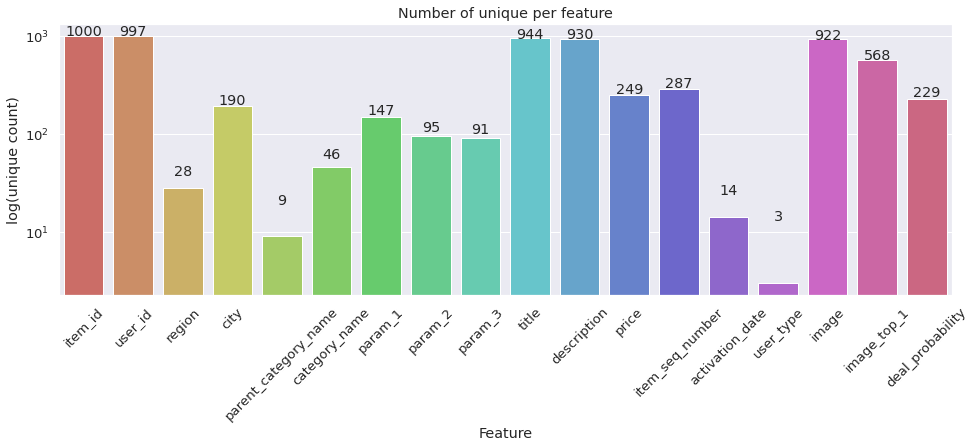

In [13]:
plt.figure(figsize=(16, 5))

cols = train.columns

uniques = [len(train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette='hls', log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Observações 

Colunas com maior quantidade de valores únicos
- item_id, user_id, title, description, image, image_top1
- param1, param2, param3, city, price

## <a id='cfmde'> 3.4 Manipulação do dataset</a>
    
### Converter Dados

In [14]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

params_top35_map = {'Женская одежда':"Women's clothing",
                    'Для девочек':'For girls',
                    'Для мальчиков':'For boys',
                    'Продам':'Selling',
                    'С пробегом':'With mileage',
                    'Аксессуары':'Accessories',
                    'Мужская одежда':"Men's Clothing",
                    'Другое':'Other','Игрушки':'Toys',
                    'Детские коляски':'Baby carriages', 
                    'Сдам':'Rent',
                    'Ремонт, строительство':'Repair, construction',
                    'Стройматериалы':'Building materials',
                    'iPhone':'iPhone',
                    'Кровати, диваны и кресла':'Beds, sofas and armchairs',
                    'Инструменты':'Instruments',
                    'Для кухни':'For kitchen',
                    'Комплектующие':'Accessories',
                    'Детская мебель':"Children's furniture",
                    'Шкафы и комоды':'Cabinets and chests of drawers',
                    'Приборы и аксессуары':'Devices and accessories',
                    'Для дома':'For home',
                    'Транспорт, перевозки':'Transport, transportation',
                    'Товары для кормления':'Feeding products',
                    'Samsung':'Samsung',
                    'Сниму':'Hire',
                    'Книги':'Books',
                    'Телевизоры и проекторы':'Televisions and projectors',
                    'Велосипеды и самокаты':'Bicycles and scooters',
                    'Предметы интерьера, искусство':'Interior items, art',
                    'Другая':'Other','Косметика':'Cosmetics',
                    'Постельные принадлежности':'Bed dress',
                    'С/х животные' :'Farm animals','Столы и стулья':'Tables and chairs'}

In [15]:
## Convert Russian to English

train['region_english'] = train['region'].apply(lambda x : region_map[x])
train['parent_category_name_english'] = train['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train['category_name_english'] = train['category_name'].apply(lambda x : category_map[x])

In [16]:
train.head()

item_id       user_id                 region              city  \
0  b912c3c6a6ad  e00f8ff2eaf9   Свердловская область      Екатеринбург   
1  2dac0150717d  39aeb48f0017      Самарская область            Самара   
2  ba83aefab5dc  91e2f88dd6e3     Ростовская область    Ростов-на-Дону   
3  02996f1dd2ea  bf5cccea572d              Татарстан  Набережные Челны   
4  7c90be56d2ab  ef50846afc0b  Волгоградская область         Волгоград   

  parent_category_name               category_name  \
0          Личные вещи  Товары для детей и игрушки   
1      Для дома и дачи           Мебель и интерьер   
2  Бытовая электроника               Аудио и видео   
3          Личные вещи  Товары для детей и игрушки   
4            Транспорт                  Автомобили   

                       param_1     param_2 param_3                  title  \
0    Постельные принадлежности         NaN     NaN  Кокоби(кокон для сна)   
1                       Другое         NaN     NaN      Стойка для Одежды   
2  Видео, DVD и Blu-ray плееры         NaN     NaN         Philips bluray   
3         Автомобильные кресла         NaN     NaN             Автокресло   
4                   С пробегом  ВАЗ (LADA)    2110         ВАЗ 2110, 2003   

   ...    price  item_seq_number  activation_date user_type  \
0  ...    400.0                2       2017-03-28   Private   
1  ...   3000.0               19       2017-03-26   Private   
2  ...   4000.0                9       2017-03-20   Private   
3  ...   2200.0              286       2017-03-25   Company   
4  ...  40000.0                3       2017-03-16   Private   

                                               image image_top_1  \
0  d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...      1008.0   
1  79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...       692.0   
2  b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...      3032.0   
3  e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...       796.0   
4  54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...      2264.0   

   deal_probability     region_english parent_category_name_english  \
0           0.12789  Sverdlovsk oblast          Personal belongings   
1           0.00000      Samara oblast      For the home and garden   
2           0.43177      Rostov oblast         Consumer electronics   
3           0.80323          Tatarstan          Personal belongings   
4           0.20797   Volgograd oblast                    Transport   

          category_name_english  
0  Children's products and toys  
1        Furniture and interior  
2               Audio and video  
3  Children's products and toys  
4                          Cars  

[5 rows x 21 columns]

# <a id='de'>4. Visualização dos dados</a>

## <a id='hadodp'>4.1 Histograma e distribuição da probabilidade de venda</a>

**Deal_probability (probabilidade de venda) - É a probabilidade de um anúncio ter vendido algo. O valor desta coluna varia de zero a um.**

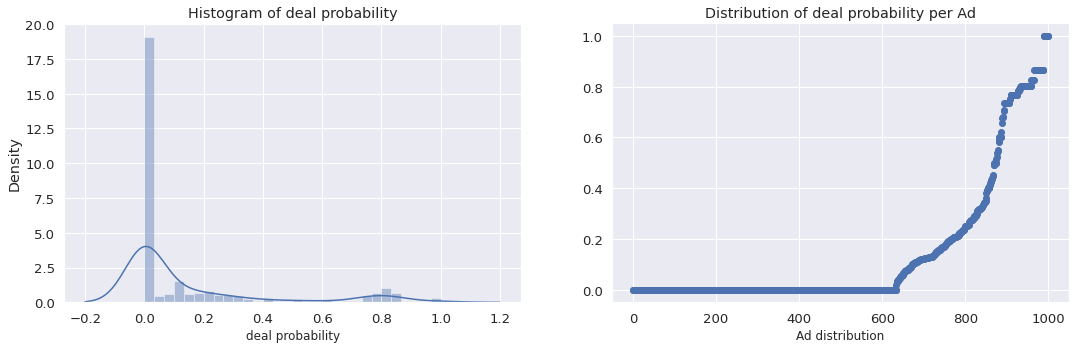

In [17]:
plt.figure(figsize = (18, 5))

plt.subplot(121)
sns.distplot(train['deal_probability'])
plt.xlabel('deal probability', fontsize=12)
plt.title("Histogram of deal probability") # Histogram of likelihood that an ad actually sold something


plt.subplot(122)
plt.scatter(range(train.shape[0]), np.sort(train.deal_probability.values))
plt.xlabel('Ad distribution', fontsize=12)
plt.title("Distribution of deal probability per Ad") # Distribution of likelihood that an ad actually sold something

plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 0.9)
plt.show()

Observações

- A partir do gráfico do histograma de distribuição, fica claro que a maioria dos itens tem probabilidade de negócio extremamente baixa, ou seja,
<br> cerca de 80%, enquanto muito poucos valores têm a probabilidade de negócio de 0,7 ou maior.

- Uma torre muito pequena é observada perto da probabilidade de 1,0, 
<br>indicando que há alguns itens no conjunto de dados com um valor muito alto de probabilidade de negociação.

- Pelo gráfico de distribuição, nota-se que amaior parte dos items (>50%) apresenta probabilidade de 0,0, e um parcela menor de items apresenta probabilidade não nula.

## <a id='hadoap'>4.2 Classes da variável 'deal probability'</a>

In [18]:
def _generate_bar_plot_hor(df, col, title, color, w=None, h=None, lm=0, limit=100):
    cnt_srs = df[col].value_counts()[:limit]     
    trace = go.Bar(y=cnt_srs.index[::-1], x=cnt_srs.values[::-1], orientation = 'h',
        marker=dict(color=color))

    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def _generate_bar_plot_ver(df, col, title, color, w=None, h=None, lm=0, limit=100, need_trace = False):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(x=list(cnt_srs.index), y=list(cnt_srs.values),
        marker=dict(color = color))
    if need_trace:
        return trace
    if w != None and h != None:
        layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    else:
        layout = dict(title=title, margin=dict(l=lm))
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [19]:
# bins of deal probability
# interval = (-0.99, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.1)
# cats = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9','0.9-1.0']
# train['deal_class_two_classes'] = train['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
# train['deal_class_mult_classes'] = pd.cut(train.deal_probability, interval, labels=cats)

In [20]:
interval = (-0.99, .02, .05, .1, .15, .2, .35, .50, .70,.85,2)
cats = ['0 -.02%', '.02%-.05%', '.05-.10', '.10-.15', '.15-.20', '.20-.35', '.35-.50', '.50-.70', '.70-.85','.85+']

train['deal_class_two_classes'] = train['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
train['deal_class_mult_classes'] = pd.cut(train.deal_probability, interval, labels=cats)

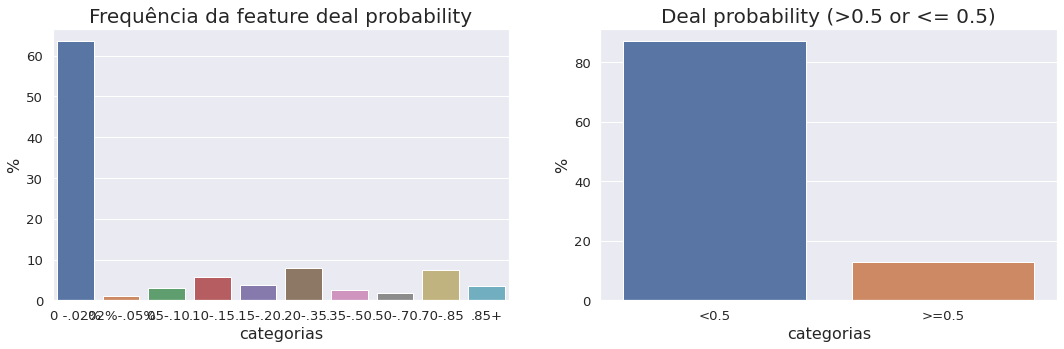

In [21]:
plt.figure(figsize = (18, 5))

prob_cat_percent = train["deal_class_mult_classes"].value_counts() / len(train['deal_probability'])* 100
plt.subplot(121)
sns.barplot(prob_cat_percent.index, prob_cat_percent.values)
plt.xlabel('categorias',fontsize=16)
plt.ylabel('%',fontsize=16)
plt.title('Frequência da feature deal probability',fontsize= 20)

prob_cat_percent = train["deal_class_two_classes"].value_counts() / len(train['deal_probability'])* 100
plt.subplot(122)
sns.barplot(prob_cat_percent.index, prob_cat_percent.values)
plt.xlabel('categorias',fontsize=16)
plt.ylabel('%',fontsize=16)
plt.title('Deal probability (>0.5 or <= 0.5)',fontsize= 20)
plt.show()


Observaçoes
- As categorias dominantes são itens com probabilidade de negócio: 0-0.1, 0.1-0.2
- Existem uma grande parcela de itens com probabilidade de negócio menor que 0,5.


## <a id='hadoapi'>4.3 Distribuição do preço </a>

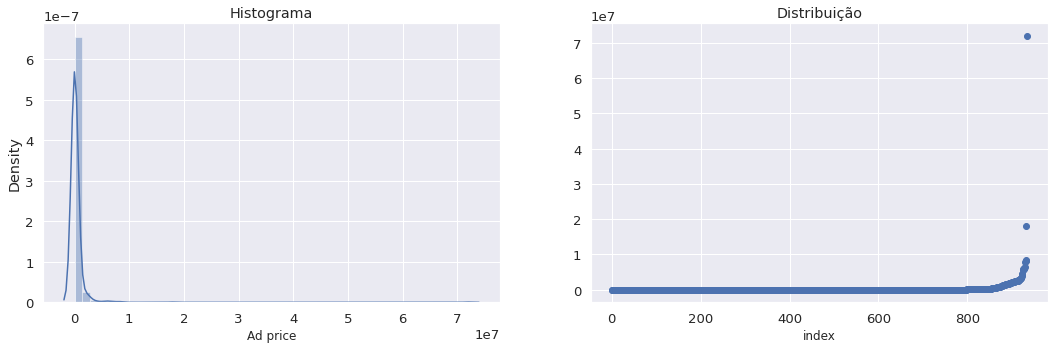

In [22]:
plt.figure(figsize = (18, 5))

plt.subplot(121)
sns.distplot(train['price'])
plt.xlabel('Ad price', fontsize=12)
plt.title("Histograma") # Histogram of likelihood that an ad actually sold something

plt.subplot(122)
plt.scatter(range(train.shape[0]), np.sort(train.price.values))
plt.xlabel('index', fontsize=12)
plt.title("Distribuição") # Distribution of likelihood that an ad actually sold something

plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 0.9)
plt.show()

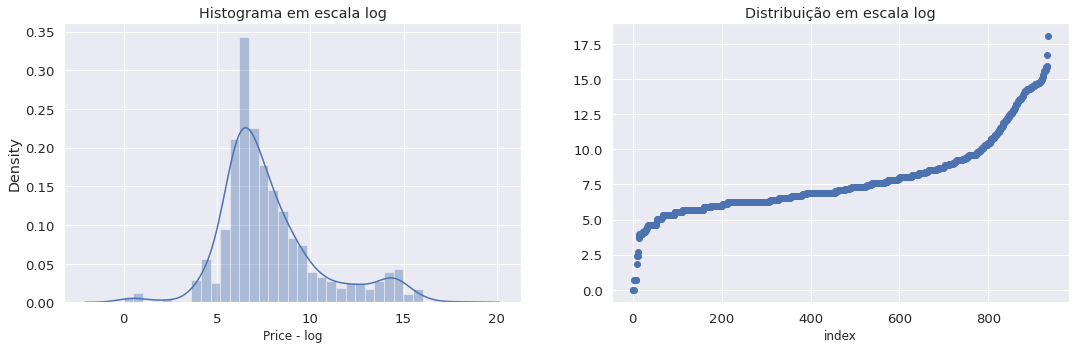

In [23]:
train['price_log'] = np.log(train['price'] + 1) # log scale of 'price'

plt.figure(figsize = (18, 5))

plt.subplot(121)
sns.distplot(train['price_log'])
plt.xlabel('Price - log', fontsize=12)
plt.title("Histograma em escala log") # Histogram of likelihood that an ad actually sold something

plt.subplot(122)
plt.scatter(range(train.shape[0]), np.sort(train.price_log.values))
plt.xlabel('index', fontsize=12)
plt.title("Distribuição em escala log") # Distribution of likelihood that an ad actually sold something

plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 0.9)
plt.show()

Observaçoes

Grande parte dos dados está abaixo de 10 na escala log do preço

## <a id='hadoapp'>4.4 Probabilidade de venda em função do preço</a>

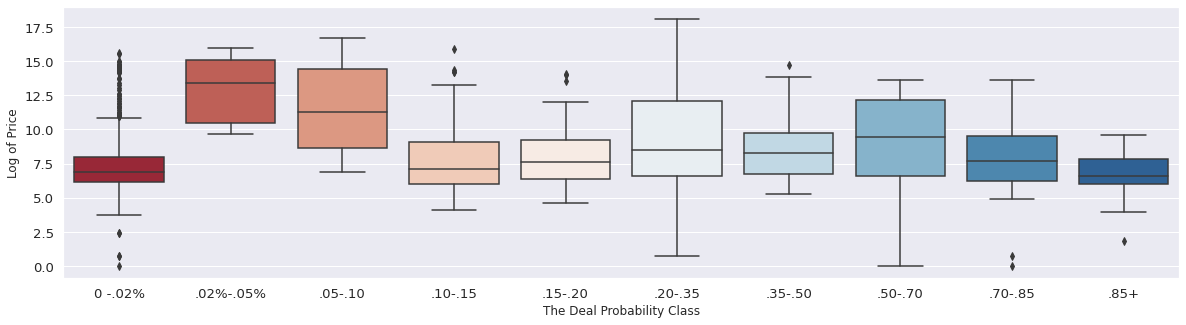

In [24]:
plt.figure(figsize = (20, 5))

train['price_log'] = np.log(train['price'] + 1)
#sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.boxplot(x='deal_class_mult_classes', y='price_log', data=train, palette="RdBu")
g.set_xlabel('The Deal Probability Class',fontsize=12)
g.set_ylabel('Log of Price',fontsize=12)
plt.show()

Observações

- O preço é mais variado em itens com a probabilidade de negócio mais baixa.

- Itens com baixa probabilidade de compra têm o preço mais baixo, enquanto é ligeiramente mais alto para itens com probabilidade de compra maior.
- Nota-se que para itens com a maior probabilidade de compra (0.9-1.0), o preço é mais baixo que para os de menor probabilidade de compra.

In [25]:
#del train['deal_class_mult_classes']
#del train['deal_class_two_classes']
#del train['price_log']
gc.collect()

27814

## <a id='dodart'>4.5 Tipos de usuário</a>

**User_type - categoria do anunciante**

User Type % Proportion
Private    71.2
Company    24.7
Shop        4.1
Name: user_type, dtype: float64


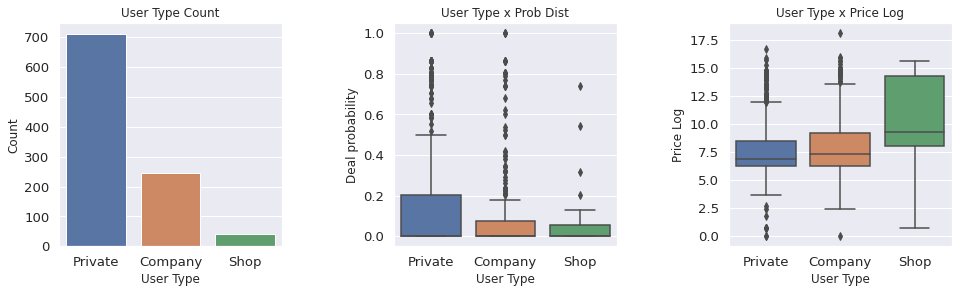

In [26]:
print("User Type % Proportion")
print(round(train['user_type'].value_counts() / len(train) * 100, 2))

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
g = sns.countplot(x='user_type', data=train, )
g.set_xlabel('User Type',fontsize=12)
g.set_ylabel('Count',fontsize=12)
g.set_title('User Type Count',fontsize= 12)

plt.subplot(1,3,2)
g1 = sns.boxplot(x='user_type', y='deal_probability', data=train)
g1.set_xlabel('User Type',fontsize=12)
g1.set_ylabel('Deal probability',fontsize=12)
g1.set_title('User Type x Prob Dist',fontsize= 12)

plt.subplot(1,3,3)
g1 = sns.boxplot(x='user_type', y='price_log', data=train)
g1.set_xlabel('User Type',fontsize=12)
g1.set_ylabel('Price Log',fontsize=12)
g1.set_title('User Type x Price Log',fontsize= 12)

plt.subplots_adjust(wspace = 0.5, hspace = 0.3,top = 0.9)
plt.show()

* **Observaçoes**
  * Maior frequencia de ads em Private
  * Maior variabilidade de deal probability em Private
  * Maior preço em Shop

## <a id='dodare'>4.6 Categorias</a>

**Parent_category_name - Categoria principal dos anúncio.
<br>Category_name - Categoria refinada dos anúncios.**

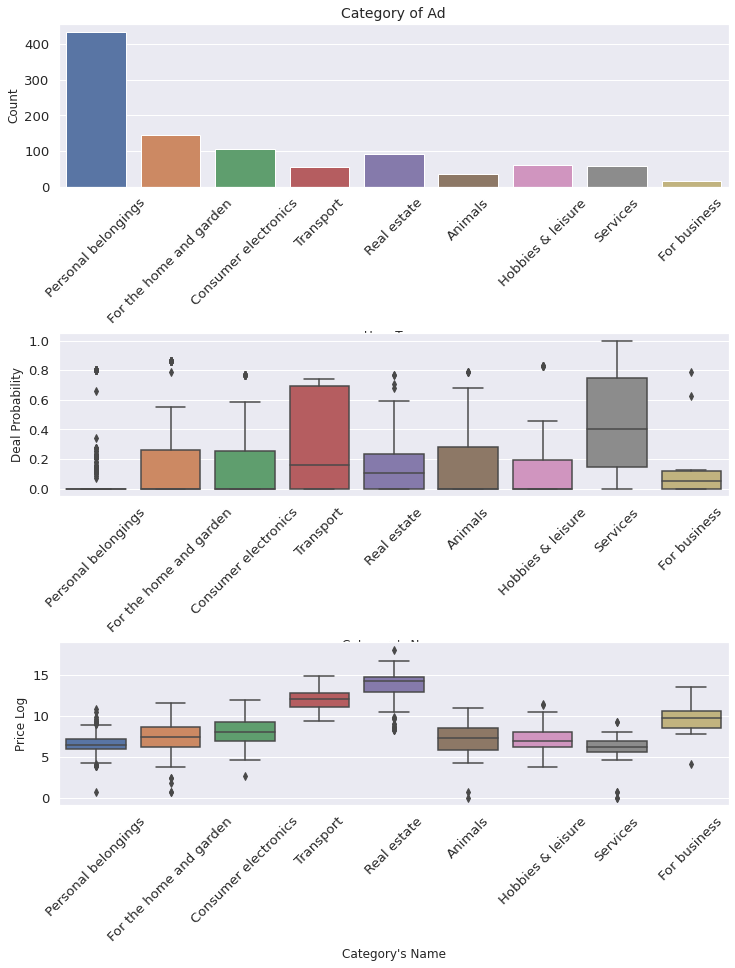

In [27]:
plt.figure(figsize=(12,14))

plt.subplot(3,1,1)
g = sns.countplot(x='parent_category_name_english', data=train)
g.set_xlabel('User Type',fontsize=12)
g.set_ylabel('Count',fontsize=12)
g.set_title('Category of Ad',fontsize= 14)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(x='parent_category_name_english',y='deal_probability', data=train)
g1.set_xlabel("Category's Name",fontsize=12)
g1.set_ylabel('Deal Probability',fontsize=12)
#g1.set_title('Category of Ad',fontsize= 20)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(x='parent_category_name_english', y='price_log', data=train)
g2.set_xlabel("Category's Name",fontsize=12)
g2.set_ylabel('Price Log',fontsize=12)
#g2.set_title('Category of Ad',fontsize= 20)
g2.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.9,top = 0.9)

plt.show()

**Observacoes**
- As categorias tem alta variabilidade na variavel target, probabilidade de venda, 
- Diferença na distribuição do preço entre as categorias.
    - Personal Belongins, maior quantidade, menor deal probability.
    - Transport, apresnta maiores preços e alta probabilidade de venda.

### <a id='dodao'>4.6.1 Distribuição de itens por categoria</a>

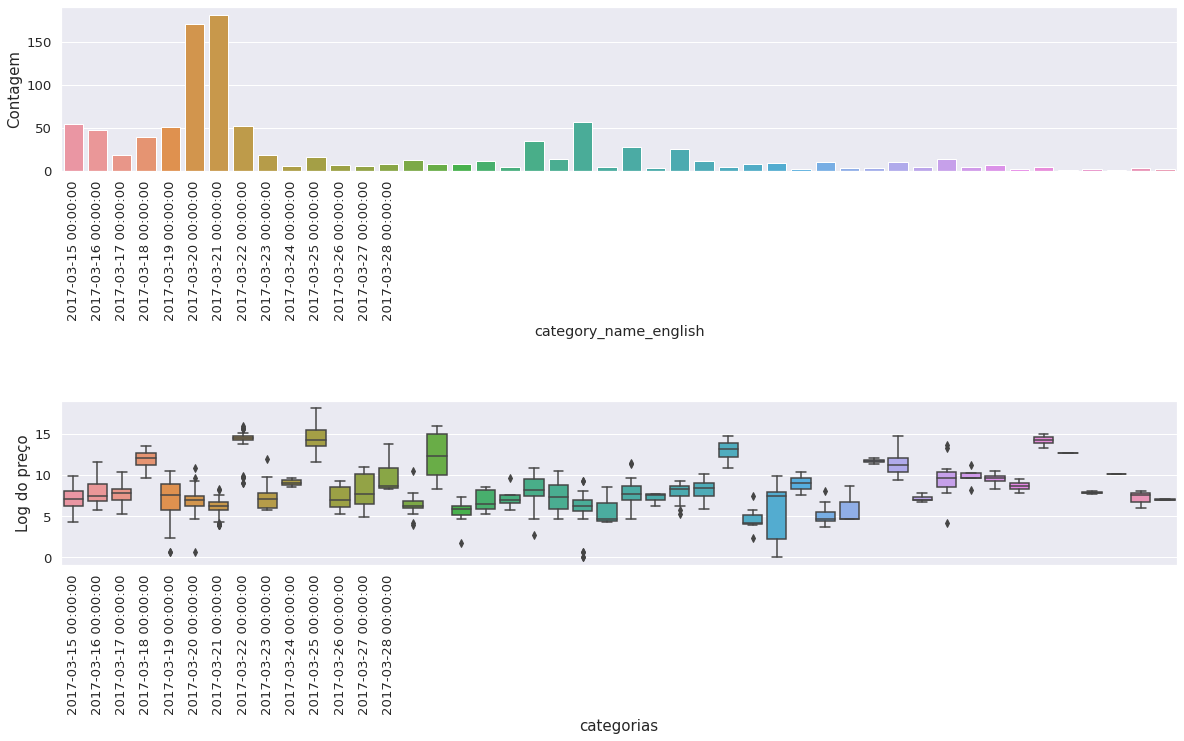

In [174]:
plt.figure(figsize=(20,10))
#fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1=plt.subplot(2,1,1)
ax1 = sns.countplot(x='category_name_english', data=train)
ax1.set_xticklabels(g.get_xticklabels(),rotation=90)
#ax1.set_xlabel('Category Names', fontsize=15)
ax1.set_ylabel('Contagem', fontsize=15)
#ax1.set_title('Category Name Count', fontsize=20)

ax2=plt.subplot(2,1,2)
ax2 = sns.boxplot(x='category_name_english', y='price_log', data=train)
ax2.set_xticklabels(g1.get_xticklabels(),rotation=90)
ax2.set_xlabel('categorias', fontsize=15)
ax2.set_ylabel('Log do preço', fontsize=15)
#ax2.set_title('Category Name Count', fontsize=20)

#ax1.get_shared_x_axes().join(ax1, ax2)
#ax1.set_xticklabels([])

plt.subplots_adjust(hspace = 1.4,top = 0.9)

plt.show()

**Observaçoes**
- 
- 

### <a id='dodaott'>4.6.2 Probabilidade de venda em cada categoria</a>

In [29]:
cols = ['category_name_english','deal_class_mult_classes']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(train[cols[0]], train[cols[1]]).style.background_gradient(cmap = cm)

## <a id='dodar'>4.7 Distribuição de itens por região</a>

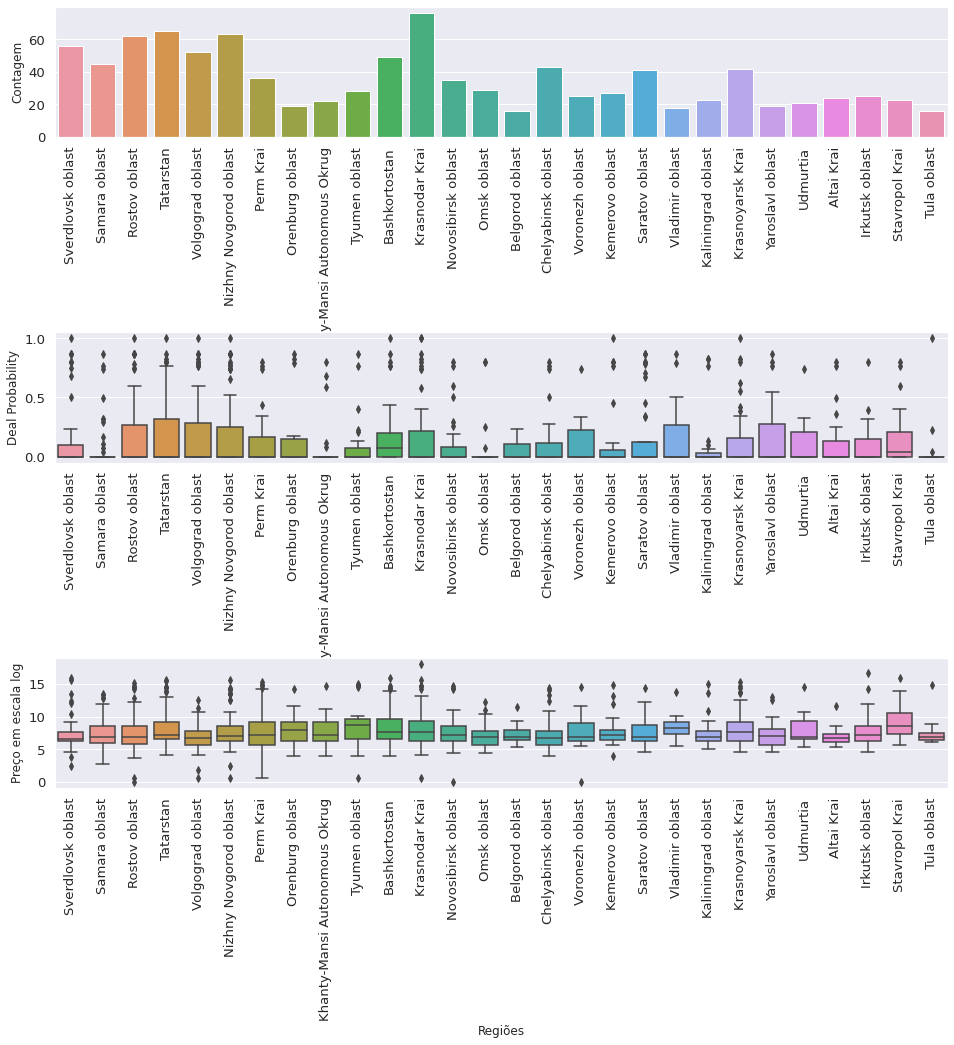

In [30]:
plt.figure(figsize=(16,14))
plt.subplot(3,1,1)
g = sns.countplot(x='region_english', data=train)
#g.set_xlabel('Ad Regions',fontsize=12)
g.set_ylabel('Contagem',fontsize=12)
#g.set_title('Ad Regions Count',fontsize= 12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(3,1,2)
g1 = sns.boxplot(x='region_english', y='deal_probability',data=train)
#g1.set_xlabel('Ad Regions',fontsize=12)
g1.set_ylabel('Deal Probability',fontsize=12)
#g1.set_title('Ad Regions Deal Prob Distribuition',fontsize= 120)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)

plt.subplot(3,1,3)
g2 = sns.boxplot(x='region_english', y='price_log',data=train)
g2.set_xlabel('Regiões',fontsize=12)
g2.set_ylabel('Preço em escala log',fontsize=12)
#g2.set_title('Ad Regions Price Distribuition',fontsize= 12)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 1.5,top = 0.9)

plt.show()

Observaçoes
- As regiões apresentam diferentes quantidade de itens (ads)
- A probabilidade de venda (deal probability) é variada conforme a região.
- A media de preços apresenta consistência na distribuição dentro das regiões.
- É possível observar visualmente que a probabilidade de venda segue a tendencia da quantidade de itens por região (quanto mais itens, maior a probabilidade)

### <a id='dodarrrr'>4.7.1 Maiores e menores probabiliade de venda por região</a>

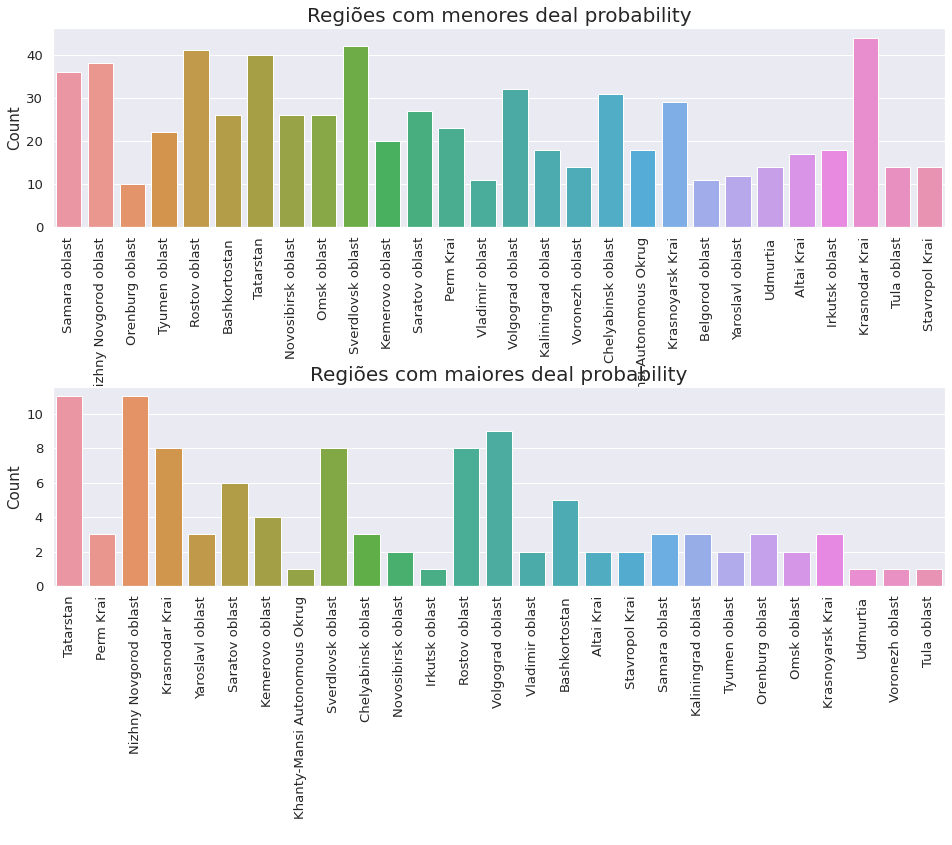

In [31]:
lower_probs = ['0 -.02%', '.02%-.05%', '.05-.10']
higher_probs = ['.70-.85', '.85+']

plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
g = sns.countplot(x='region_english', data=train[train.deal_class_mult_classes.isin(lower_probs)])
g.set_title("Regiões com menores deal probability", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
#g.set_xlabel("Regions", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.subplot(2,1,2)
g1 = sns.countplot(x='region_english', data=train[train.deal_class_mult_classes.isin(higher_probs)])
g1.set_title("Regiões com maiores deal probability", fontsize=20)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel(" ",fontsize=15)
g1.set_ylabel("Count", fontsize=15)

plt.subplots_adjust(hspace = 0.8,top = 0.9)

plt.show()

Observaçoes
- Regiões com maiores deal probability tem maior concentração de distribuição dos Ads
- Os Ads com menores deal probability estão distribuídos em mais regiões.

### <a id='dodarrrr'>4.7.2 Distribuiçao por cidade</a>

In [32]:
cities_top_35 = ['Краснодар', 'Екатеринбург', 'Новосибирск', 'Ростов-на-Дону',
       'Нижний Новгород', 'Челябинск', 'Пермь', 'Казань', 'Самара', 'Омск',
       'Уфа', 'Красноярск', 'Воронеж', 'Волгоград', 'Саратов', 'Тюмень',
       'Калининград', 'Барнаул', 'Ярославль', 'Иркутск', 'Оренбург', 'Сочи',
       'Ижевск', 'Тольятти', 'Кемерово', 'Белгород', 'Тула', 'Ставрополь',
       'Набережные Челны', 'Новокузнецк', 'Владимир', 'Сургут', 'Магнитогорск',
       'Нижний Тагил', 'Новороссийск']

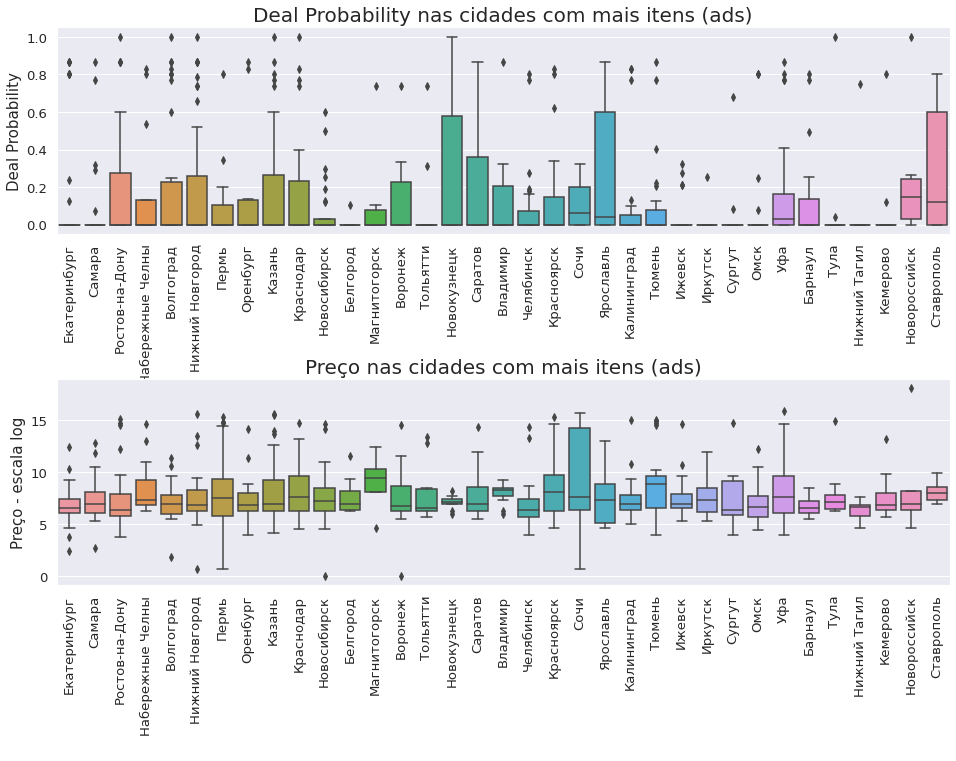

In [33]:
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
g = sns.boxplot(x='city', y='deal_probability', data=train[train.city.isin(cities_top_35)])
g.set_xlabel("", fontsize=15)
g.set_ylabel("Deal Probability", fontsize=15)
g.set_title("Deal Probability nas cidades com mais itens (ads)", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='city', y='price_log', data=train[train.city.isin(cities_top_35)])
g1.set_xlabel(" ", fontsize=15)
g1.set_ylabel("Preço - escala log", fontsize=15)
g1.set_title("Preço nas cidades com mais itens (ads)", fontsize=20)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

In [34]:
cols = ['region_english','deal_class_mult_classes']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(train[cols[0]], train[cols[1]]).style.background_gradient(cmap = cm)

## <a id='doday'>4.8 Distribuição dos Parâmetros</a>

**param_1, param_2, param_3 - Parâmetros consideros pelo dataset.**

In [35]:
train[['param_1', 'param_2', 'param_3']].head(10)

param_1        param_2     param_3
0    Постельные принадлежности            NaN         NaN
1                       Другое            NaN         NaN
2  Видео, DVD и Blu-ray плееры            NaN         NaN
3         Автомобильные кресла            NaN         NaN
4                   С пробегом     ВАЗ (LADA)        2110
5         Автомобильные кресла            NaN         NaN
6           Сантехника и сауна            NaN         NaN
7               Женская одежда         Джинсы          26
8               Женская одежда  Платья и юбки  > 50 (XXL)
9                  Для девочек          Обувь          25

In [36]:
train[['param_1', 'param_2', 'param_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   param_1  956 non-null    object
 1   param_2  553 non-null    object
 2   param_3  406 non-null    object
dtypes: object(3)
memory usage: 23.6+ KB


- Param_1 e Param_2 contêm dados do tipo texto.
- Param_1 contem > 50% de valores presentes.
- Param_3 contém um tipo de categorização como comprimentos em centímetros, quantidades, etc.

In [37]:
params = train.param_1.value_counts().head(35)

params.index = ["Women's Clothing", 'For Girls', 'For Boys', 'Selling',
                'With mileage', 'Accessories', "Men's clothing", 'Other', 'Toys',
                'Baby carriages', 'Rent', 'Repair, construction', 'Building materials',
                'iPhone', 'Beds, sofas and armchairs', 'Tools', 'For the kitchen',
                'Accessories', "Children's Furniture", 'Cabinets and Chests', 
                'Devices and accessories', 'For the house', 'Transport, transportation',
                'Nursing Items', 'Samsung', 'Hire', 'Books',
                'TVs and projectors', 'Bicycles and scooters',
                'Interior items, art', 'Other', 'Cosmetics',
                'Bedding', 'Farm animals', 'Tables and chairs']

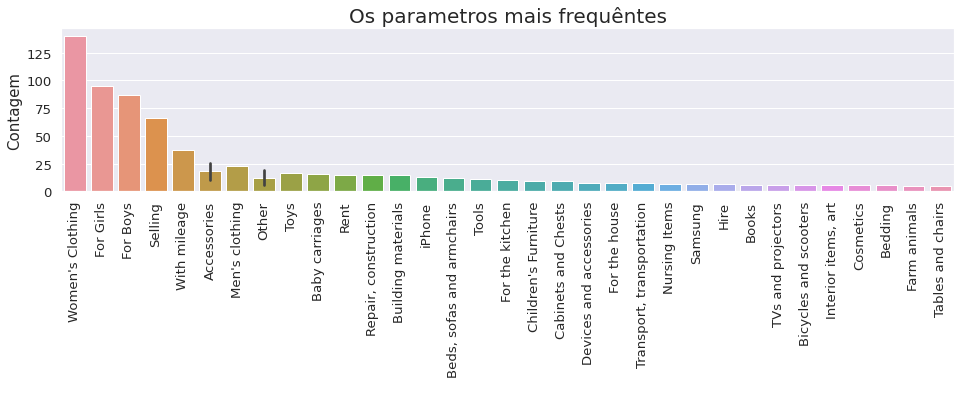

In [38]:
plt.figure(figsize=(16,3))

g = sns.barplot(x=params.index, y=params.values)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Contagem", fontsize=15)
g.set_title("Os parametros mais frequêntes", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

In [39]:
print("Top five Ad param:  %")
print(round((params / len(train) * 100).head(n=5),2))

Top five Ad param:  %
Women's Clothing    14.0
For Girls            9.5
For Boys             8.7
Selling              6.6
With mileage         3.7
Name: param_1, dtype: float64


In [40]:
russian_param_names = ["Женская одежда","Для девочек","Для мальчиков","Продам", "С пробегом","Аксессуары",
"Мужская одежда","Другое","Игрушки","Детские коляски","Сдам","Ремонт, строительство","Стройматериалы",
"iPhone","Кровати, диваны и кресла","Инструменты","Для кухни","Комплектующие","Детская мебель","Шкафы и комоды",
"Приборы и аксессуары","Для дома","Транспорт, перевозки","Товары для кормления","Samsung","Сниму",
"Книги","Телевизоры и проекторы","Велосипеды и самокаты","Предметы интерьера, искусство","Другая",
"Косметика","Постельные принадлежности","С/х животные","Столы и стулья"]

subset_param = train[train.param_1.isin(russian_param_names)]

subset_param['param_en'] = subset_param['param_1'].apply(lambda x : params_top35_map[x])

## <a id='dodattty'>4.8.1 Influência dos Parametro-1 no preço e na probabilidade de venda</a>

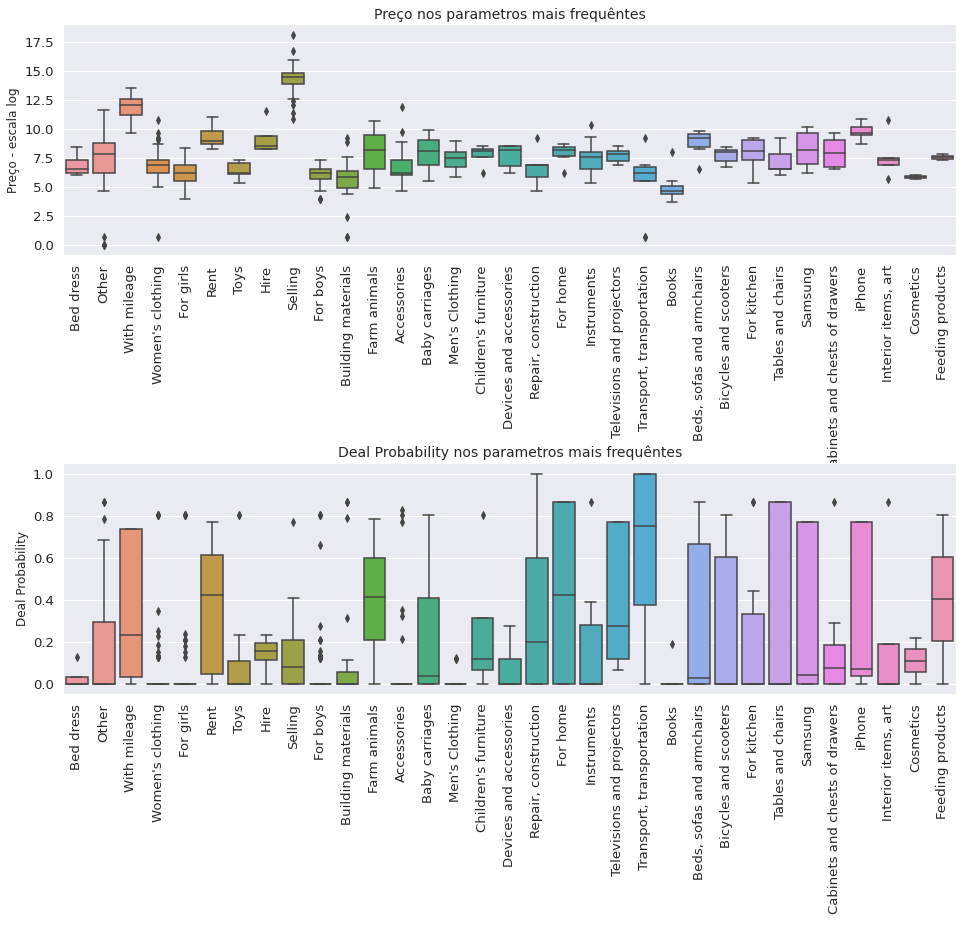

In [41]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
g = sns.boxplot(x='param_en', y='price_log', data=subset_param)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Preço - escala log", fontsize=12)
g.set_title("Preço nos parametros mais frequêntes", fontsize=14)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='param_en', y='deal_probability', data=subset_param)
g1.set_xlabel(" ", fontsize=12)
g1.set_ylabel("Deal Probability", fontsize=12)
g1.set_title("Deal Probability nos parametros mais frequêntes", fontsize=14)
g1.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.9,top = 0.9)

plt.show()

* Observaçoes
- É possível ver que o param01 apresenta grande diversidade de preços e alta variabilidade na probabilidade de venda.

    - parametro Selling, com a maior faixa de preços , entretanto com a menor probabilidade de venda 
    - With Mileage apresentam maiores preços e maiores probabilidade de venda. 


In [42]:
cols = ['param_en','deal_class_mult_classes']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(subset_param[cols[0]], subset_param[cols[1]]).style.background_gradient(cmap = cm)

In [43]:
## feature engineering 

train['param_combined'] = train.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
train['param_combined'] = train['param_combined'].fillna(" ")
train['param_combined_len'] = train['param_combined'].apply(lambda x : len(x.split()))

Observacoes
- ..

## <a id='t'>4.9 Distribuição da data de ativação</a> 

**Activation_date: Data em que o anúncio foi ao site**

**Novas features foram criadas a partir da activation_date :**

 - month
 - weekday
 - month_day

In [44]:
train['activation_date'] = pd.to_datetime(train['activation_date'])
#test['activation_date'] = pd.to_datetime(test['activation_date'])

# ***** Train data *******
train["month"] = train["activation_date"].dt.month
train['weekday'] = train['activation_date'].dt.weekday
train["day"] = train['activation_date'].dt.day
train["year_Day"] = train['activation_date'].dt.dayofyear

# # ***** Test data *******
# test["month"] = test["activation_date"].dt.month
# test['weekday'] = test['activation_date'].dt.weekday
# test["day"] = test['activation_date'].dt.day
# test["year_Day"] = test['activation_date'].dt.dayofyear 

## Fill NaN
train["description"].fillna("NA", inplace=True)
#test["description"].fillna("NA", inplace=True)

# periods_train
periods_train['total_period'] = periods_train['date_to'] - periods_train['date_from']

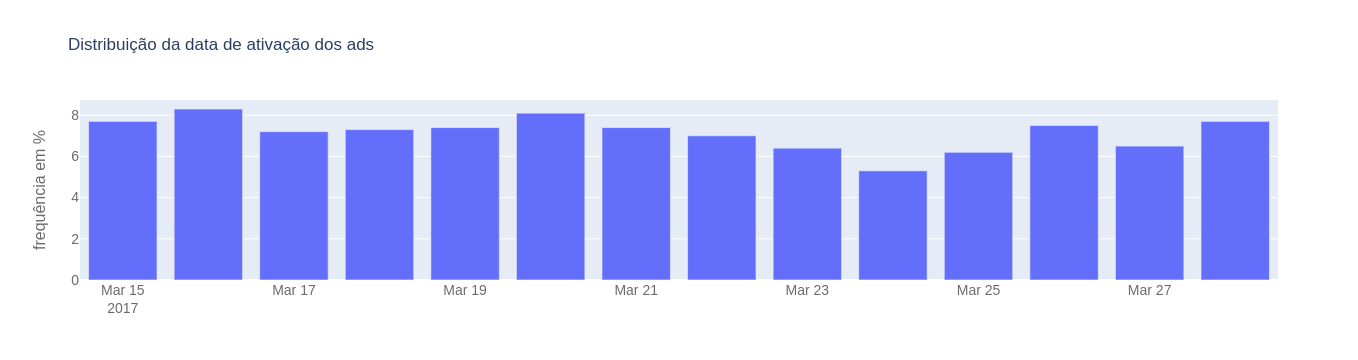

In [45]:
temp = train["activation_date"].value_counts()

trace0 = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    name = ' '
)

data = [trace0]
layout = go.Layout(
    title = " Distribuição da data de ativação dos ads",
    xaxis=dict(
        title=' ',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='frequência em %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

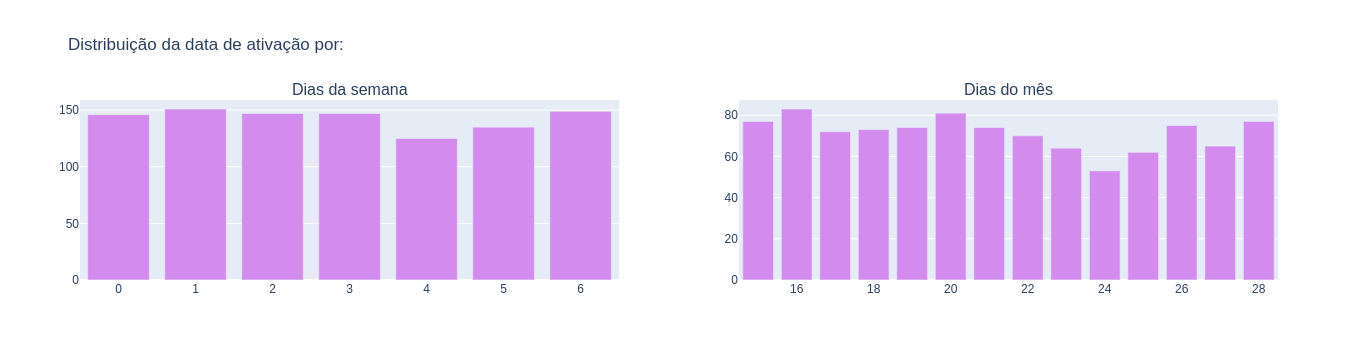

In [172]:
#cols = ['parent_category_name_english', 'category_name_english', 'region_english', 'city', 'param_1', 'param_2', 'param_3', 'weekday', 'day','title_len', 'description_len', 'image_top_1', 'user_id']

trace1 = _generate_bar_plot_ver(train, 'weekday', "WeekDays", '#d38bed', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train, 'day', "MonthDays", '#d38bed', 700, 400, 200, limit=30, need_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Dias da semana','Dias do mês'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=300,title='Distribuição da data de ativação por:', showlegend=False);
iplot(fig); 

**Observacoes**
- A data de ativação dos Ads tem como período em 15-Março a 28-Março
- Distribuição uniforme entre os dias dias da semana
- Diminuição de postagem na segunda quinzena no mês.

In [50]:
cols = ['day','deal_class_mult_classes']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(train[cols[0]], train[cols[1]]).style.background_gradient(cmap = cm)

## <a id='fodsbdiu'>4.10  Probabilidade de venda e preço em função da data de ativação do anúncio</a>

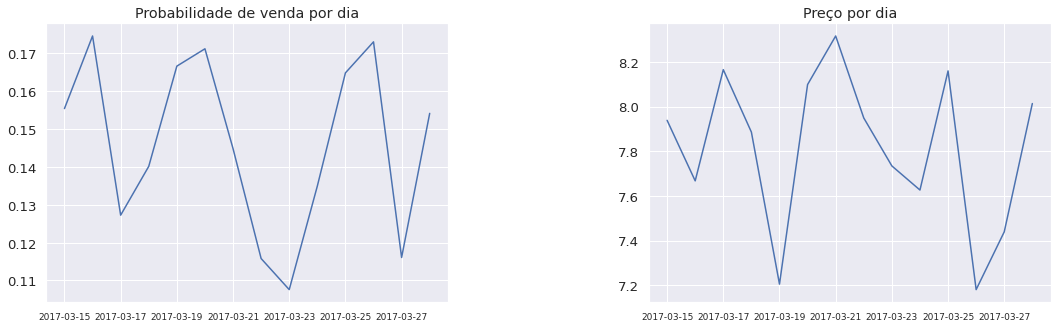

In [171]:
new_train = train.set_index('activation_date')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,5))
ax1.plot(new_train["deal_probability"].resample("D").apply([np.mean]))
ax1.set_title("Probabilidade de venda por dia")

ax2.plot(new_train["price_log"].resample("D").apply([np.mean]))
ax2.set_title("Preço por dia")

for label in (ax1.get_xticklabels() + ax2.get_xticklabels()):
    label.set_fontsize(9)

plt.subplots_adjust(wspace = 0.5, hspace = 0.3,top = 0.9)

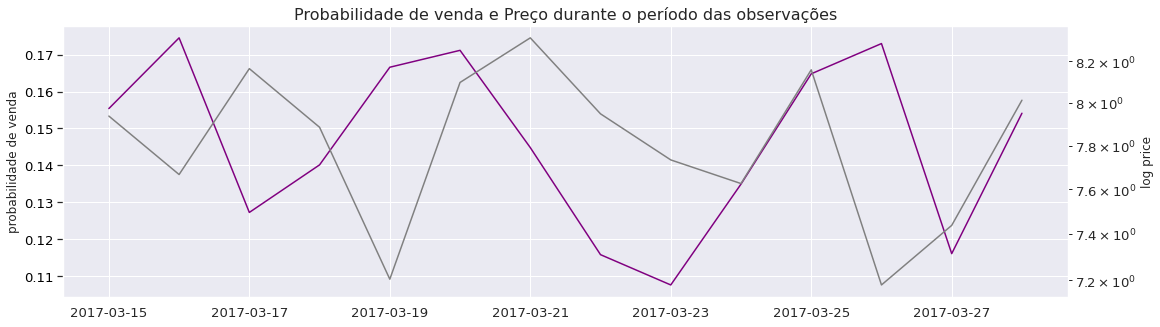

In [153]:
fig, ax = plt.subplots(figsize=(18,5))

# Plot linear sequence, and set tick labels to the same color
ax.plot(new_train["deal_probability"].resample("D").apply([np.mean]), color='purple')
ax.tick_params(axis='y', labelcolor='black')
ax.set_ylabel('probabilidade de venda', fontsize=12)

ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(new_train["price_log"].resample("D").apply([np.mean]), color='gray')
ax2.set_yscale('log')
ax2.set_ylabel('log price', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

ax.set_title('Probabilidade de venda e Preço durante o período das observações', fontsize=16)
plt.show()

**Observaçoes**

- Média das probabilidades de venda em cada data de ativaçao dos anuncios
- Média dos preços em cada data de ativação
- Comparação entre o preço a probabilidade de vender um anúncio, no dia de sua publicação.
(roxo - probabilidade de venda, cinza - preço)


## <a id='fo'>4.11  Distribuição da Probabilidade de venda e preço durante o período das observaçoes</a>

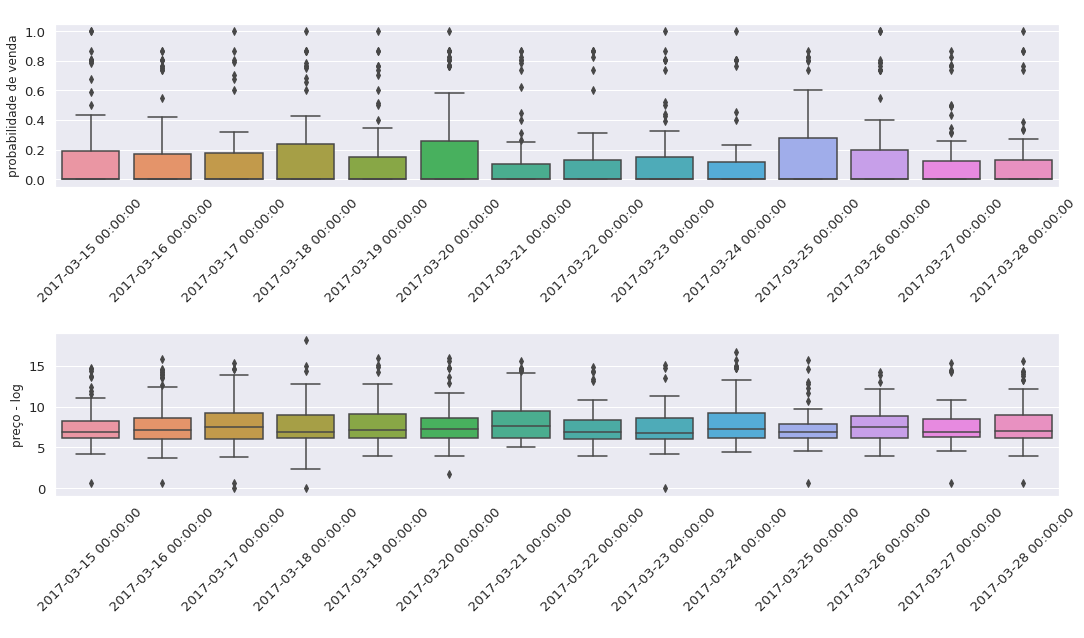

In [170]:
plt.figure(figsize=(18,14))

plt.subplot(3,1,1)
g = sns.boxplot(x=new_train.index.sort_values(), y=new_train["deal_probability"], data=subset_param)
g.set_xlabel(' ',fontsize=12)
g.set_ylabel('probabilidade de venda',fontsize=12)
g.set_title(' ',fontsize= 14)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(x=new_train.index.sort_values(), y=new_train["price_log"], data=subset_param)
g1.set_xlabel(" ",fontsize=12)
g1.set_ylabel('preço - log',fontsize=12)
g1.set_title(' ',fontsize= 14)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.9,top = 0.9)

plt.show()

**Observações**

- Probabilidade de venda não apresenta grandes variações em funçao data de postagem.
- Preços, baixa variabilidade, distribuição normal durante o perído.

In [61]:
periods_train['total_days'] = periods_train['date_to'] - periods_train['date_from']
#periods_test['total_days'] = periods_test['date_to'] - periods_test['date_from']
periods_train['total_days_value'] = periods_train['total_days'].dt.days
periods_train.index = pd.to_datetime(periods_train['activation_date'])

## <a id='totar'>5.5 Distribuição do título e descrição</a>

**title: titulo do anúncio
<br>description: descrição do ad**

In [176]:
train[['title','description']]

title  \
0                Кокоби(кокон для сна)   
1                    Стойка для Одежды   
2                       Philips bluray   
3                           Автокресло   
4                       ВАЗ 2110, 2003   
..                                 ...   
995                Продам бутсы Adidas   
996      Продам диск lara croft на psp   
997  Коттедж 150 м² на участке 12 сот.   
998                  Hyundai i30, 2012   
999                       Породам окно   

                                           description  
0    Кокон для сна малыша,пользовались меньше месяц...  
1            Стойка для одежды, под вешалки. С бутика.  
2    В хорошем состоянии, домашний кинотеатр с blu ...  
3                               Продам кресло от0-25кг  
4                             Все вопросы по телефону.  
..                                                 ...  
995  продам бутсы в отличном состоянии.отыграл 3 тр...  
996                                                 NA  
997  Продается чудесный коттедж в экологически чист...  
998  Продается автомобиль  Hyundai i30. Был куплен ...  
999  Глухое 1кам32 с.пакет, ш650в1440. Новое не под...  

[1000 rows x 2 columns]

Criar novas features :
* **char_count**
* **word_count**
* **word_density**
* **punctuation_count**
* **unique_word**
* **upper_case_word_count**
* **stopword_count**

In [177]:
start_time=time.time()

# Char count
#train['d_length'] = train['description'].apply(lambda x: len(str(x))) 
train['char_count_desc'] = train['description'].apply(len)
train['char_count_title'] = train['title'].apply(len)

# Word count
train['word_count_desc'] = train['description'].apply(lambda x: len(x.split()))
train['word_count_title'] = train['title'].apply(lambda x: len(x.split()))

# Word density 
train['word_density_desc'] = train['char_count_desc'] / (train['word_count_desc']+1)
train['word_density_title'] = train['char_count_title'] / (train['word_count_title']+1)

# Ponctuation 
train['punctuation_count_desc'] = train['description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
train['punctuation_count_title'] = train['title'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

# Unique words
train['unique_word_desc'] = train['description'].apply(lambda x: len(set(str(x).split())))
train['unique_word_title'] = train['title'].apply(lambda x: len(set(str(x).split())))

# Upper case
train['upper_case_word_count_desc'] = train['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
train['upper_case_word_count_title'] = train['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

# Stopwords count
train['stopword_count_desc'] = train['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))
train['stopword_count_title'] = train['title'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))

#Average length of the words
train["mean_word_len_title"] = train["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
train["mean_word_len_desc"] = train["description"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

end_time=time.time()
print("total time in the cuurent cell ",end_time-start_time,"s")

total time in the cuurent cell  0.10314822196960449 s


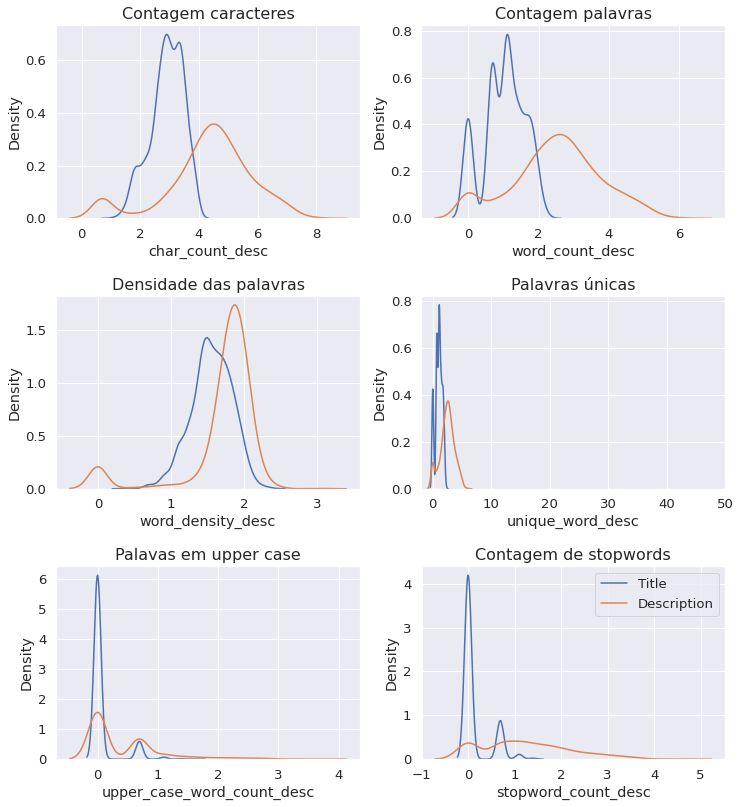

In [179]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(np.log(train['char_count_title']), 
                  hist=False, label='Title')
g1 = sns.distplot(np.log(train['char_count_desc']), 
                  hist=False, label='Description')
g1.set_title("Contagem caracteres", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(np.log(train['word_count_title']),
                  hist=False, label='Title')
g2 = sns.distplot(np.log(train['word_count_desc']), 
                  hist=False, label='Description')
g2.set_title("Contagem palavras", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(np.log(train['word_density_title']), 
                  hist=False, label='Title')
g3 = sns.distplot(np.log(train['word_density_desc']), 
                  hist=False, label='Description')
g3.set_title("Densidade das palavras", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(np.log(train["unique_word_title"]), 
                  hist=False, label='Title')
g4 = sns.distplot(np.log(train["unique_word_desc"]), 
                  hist=False, label='Description')
g4.set_xlim([-2,50])
g4.set_title('Palavras únicas', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(np.log(train["upper_case_word_count_title"] + 1) , 
                  hist=False, label='Title')
g5 = sns.distplot(np.log(train["upper_case_word_count_desc"] + 1) , 
                  hist=False, label='Description')
g5.set_title('Palavas em upper case', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(np.log(train["stopword_count_title"] + 1), 
                  hist=False, label='Title')
g6 = sns.distplot(np.log(train["stopword_count_desc"]  + 1), 
                  hist=False, label='Description')
g6.set_title('Contagem de stopwords', fontsize=16)

# plt.subplot(427)
# g7 = sns.distplot(np.log(train["mean_word_len_title"]  + 1), 
#                   hist=False, label='Title')
# g7 = sns.distplot(np.log(train["mean_word_len_desc"] + 1), 
#                   hist=False, label='Description')
#g7.set_xlim([-2,100])
#g7.set_title('Tamanho das palavras', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

Observacoes
- Em relacao a contagem de caracteres e palavras, a descriçao possui maior quantidade, pode ser do fato do limite de letras no título.
- Grupos menores de descrição apresentam pouco ou nenhuma palavra/caracter.
- Tanto o título quanto a descrição apresentam densidades semelhantes. A descrição apresenta palavras com maior quantidade de char.
- Palavras únicas, ambos apresentam poucas, a descriçao com maior quatidade de palavras únicas.
- Uppper case e stopwors, a título apresenta poucos itens.

### <a id='tnodaaa'>5.5.1 Probabilidade de venda em função da quantidade de palavras</a>

In [189]:
import plotly.figure_factory as ff

Descrição do anúncio


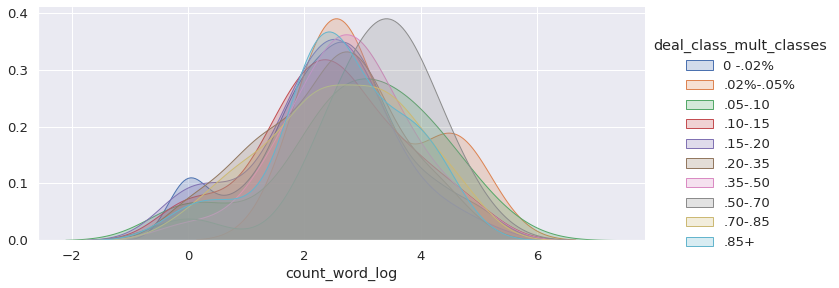

In [186]:
train['count_word_log'] = np.log(train['word_count_desc'])

(sns
  .FacetGrid(train, 
             hue='deal_class_mult_classes', 
             size=5, aspect=2)
  .map(sns.kdeplot, 'count_word_log', shade=True)
 .add_legend()
)
print('Descrição do anúncio')
plt.show()

Título do anúncio


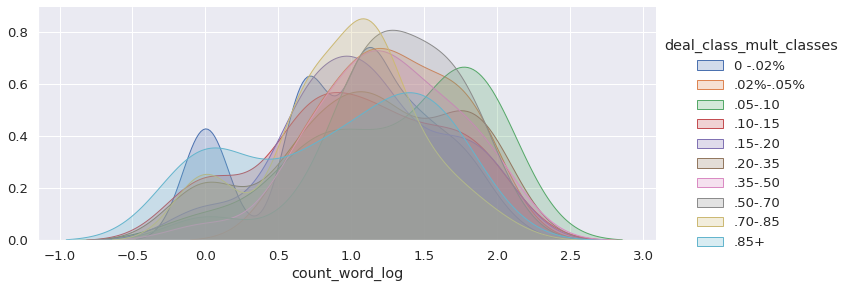

In [187]:
train['count_word_log'] = np.log(train['word_count_title'])

(sns
  .FacetGrid(train, 
             hue='deal_class_mult_classes', 
             size=5, aspect=2)
  .map(sns.kdeplot, 'count_word_log', shade=True)
 .add_legend()
)
print('Título do anúncio')
plt.show()

Observaçoes

- Os anúncios com menor número de palavras ou palavras ausentes possuem menor variação para serem vendidos.
- 
- Quantidade media de palavras maior probabilidade.

### <a id='tnodayy'>5.5.2 Probabilidade de venda em função de palavras únicas</a>

Descrição do anúncio


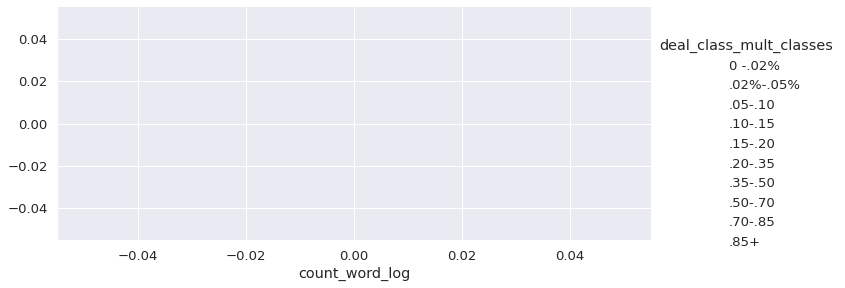

In [209]:
train['count_word_log'] = np.log(train['stopword_count_title'])

(sns
  .FacetGrid(train, 
             hue='deal_class_mult_classes', 
             size=5, aspect=2)
  .map(sns.kdeplot, 'count_word_log', shade=True)
 .add_legend()
)
print('Descrição do anúncio')
plt.show()

### <a id='tnodayiiy'>5.5.3 Probabilidade de venda em função da densidade</a>

Título do anúncio


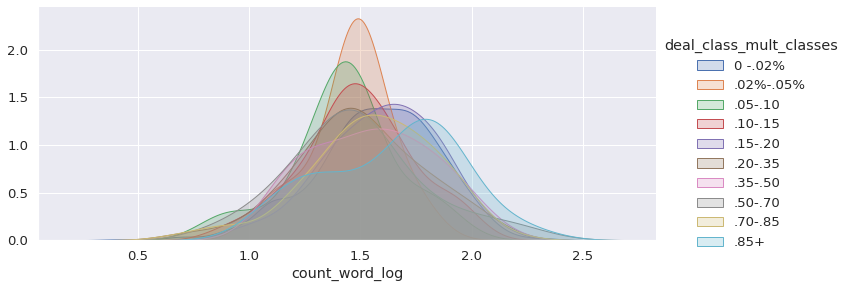

In [212]:
train['count_word_log'] = np.log(train['word_density_title'])

(sns
  .FacetGrid(train, 
             hue='deal_class_mult_classes', 
             size=5, aspect=2)
  .map(sns.kdeplot, 'count_word_log', shade=True)
 .add_legend()
)
print('Título do anúncio')
plt.show()

Observaçoes

- Os anúncios com menor número de valores únicos possuem menor variação para serem vendidos
- Palavras com mais caracteres (maior densidade) no título do anúncio tem maior probabilidade de venda.

In [65]:
## Traduzir idioma

def find_and_replace_emojis(text):
    emoji_counter = 0
    # emoji_unicodes = map( (lambda x: x.encode('utf-8')), emoji.UNICODE_EMOJI.keys())
    emoji_unicodes = emoji.UNICODE_EMOJI.keys()
    for k in emoji_unicodes:
        try:
            if k in text:
                text = text.replace(k, ' ')
                emoji_counter = emoji_counter+1
        except Exception as e:
            print(e)
            print(k)
            print(text)
            raise e
    return [emoji_counter, text]

    
def translate(file_path, prefix, col_name):

    #input_csv = pd.read_csv(file_path)
    input_csv = file_path
    translator = Translator()
    translations = {}

    num_rows = input_csv.shape[0]

    print("***TRANSLATING "+col_name.upper()+ "***")

    # Translate 20 descriptions at a time
    for i in range(0, num_rows+10, 20):

        print("starting index: " + str(i)+" of "+ str(num_rows))
        orig_text_subset = input_csv[col_name][i:i+20].fillna("None").tolist()
        item_ids = input_csv['item_id'][i:i+20].tolist()

        try:
            translations_subset = translator.translate(orig_text_subset, src='ru', dest='en')
        except Exception as ex:
            translations_subset = []
            for s in orig_text_subset:

                formatted_str = s
                num_emojis = 0
                if type(ex == ValueError):
                    removed_emojis = find_and_replace_emojis(s)
                    num_emojis = removed_emojis[0]
                    formatted_str = removed_emojis[1]

                try:
                    if num_emojis > 0:
                        translations_subset.append(translator.translate(formatted_str, src='ru', dest='en').text + " NUM_EMOJIS: " + str(num_emojis))
                    else:
                        translations_subset.append(translator.translate(formatted_str, src='ru', dest='en').text)
                except:
                    if type(ex == ValueError):
                        translations_subset.append("UNABLE TO TRANSLATE" + " NUM_EMOJIS: " + str(num_emojis))
                    else:
                        translations_subset.append("UNABLE TO TRANSLATE")
            translations.update(dict(zip(item_ids, translations_subset)))
        else:
            translations.update(
                dict(
                    zip(
                        item_ids,
                        list(map( (lambda x: x.text), translations_subset ))
                        )
                    )
            )

    #df1 = pd.DataFrame(translations.items()).to_csv(prefix +'_' + col_name +'_translation.csv', encoding='utf-8')
    df1 = pd.DataFrame(translations.items())
    return df1

def translate_title_and_description(file_path, prefix, title_only, desc_only):
    
    if title_only == 'yes':
        df1 = translate(file_path, prefix, "title")
    elif desc_only == 'yes':
        df1 = translate(file_path, prefix, "description")
    else:
        df1 = translate(file_path, prefix, "title")
        df2 = translate(file_path, prefix, "description")        
        df1 = pd.concat([df1, df2])
        
    return df1

In [66]:
##translated = translate_title_and_description(train, 'output', 'yes', 'yes')

### <a id='tnoda'>5.5.1 Descrição</a>

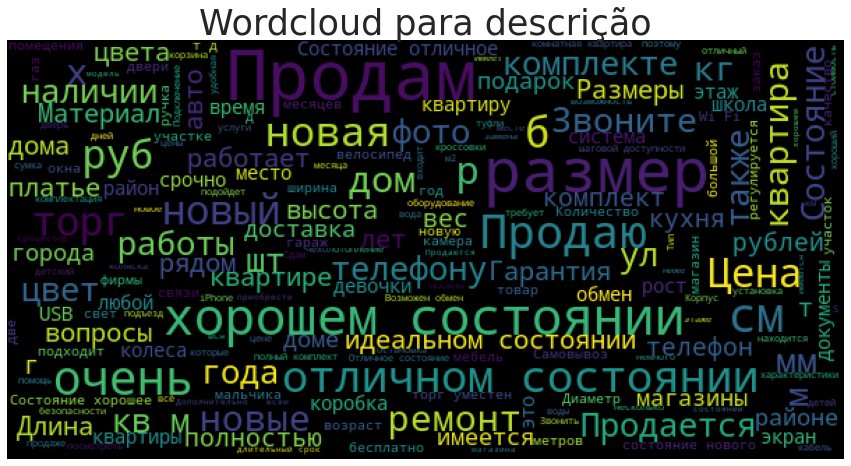

In [67]:
from wordcloud import WordCloud, STOPWORDS
names = test["description"][~pd.isnull(test["description"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300, stopwords=stop_words).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud para descrição", fontsize=35)
plt.axis("off")
plt.show() 

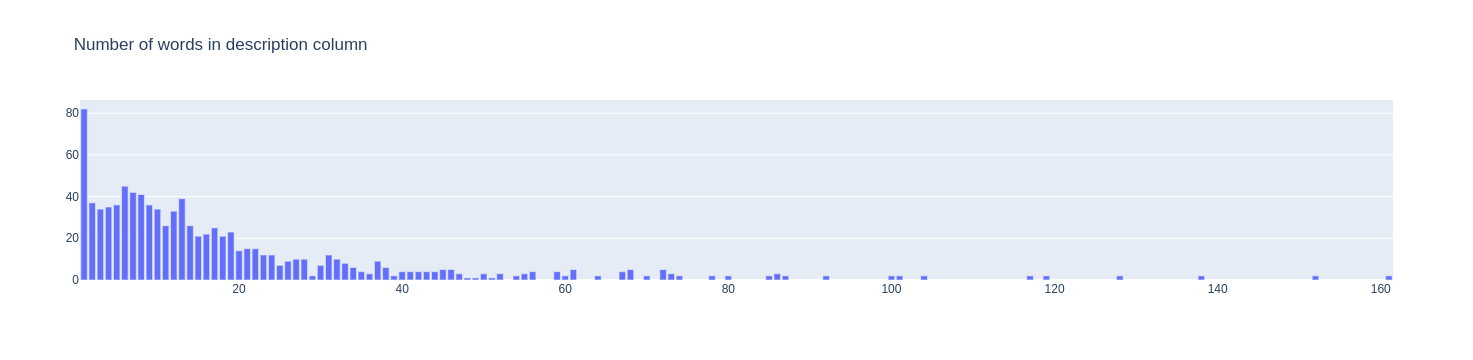

In [68]:
train["description"].fillna("NA", inplace=True)
train["desc_numOfWords"] = train["description"].apply(lambda x: len(x.split()))
temp = train["desc_numOfWords"].value_counts().head(80)
trace = go.Bar(
    x = temp.index,
    y = temp.values,
)
data = [trace]
layout = go.Layout(
    title = "Number of words in description column",
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
del train["desc_numOfWords"]

### <a id='tnodss'>5.5.2 Variável título</a>

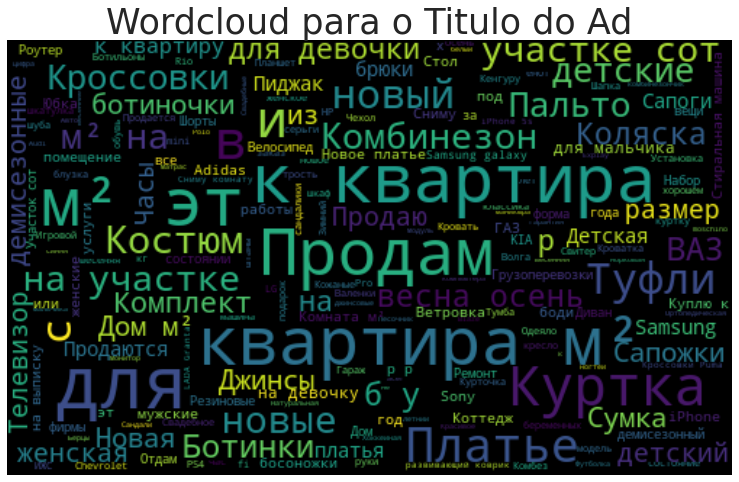

In [69]:
txt = " ".join(train.title)
def blue_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(180, 200), random.randint(60, 80))

wordcloud1 = WordCloud(max_font_size=50, width=500, height=300).generate(txt)
plt.figure(figsize=(16,8))
plt.title("Wordcloud para o Titulo do Ad", fontsize=35)
plt.imshow(wordcloud1.recolor(random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show() 

# <a id='tr'>6. Feature Engineering</a> 

# <a id='7'>7. Análise Multivariada</a> 

## <a id='7-1'> 7.1 Correlação de Pearson</a> 

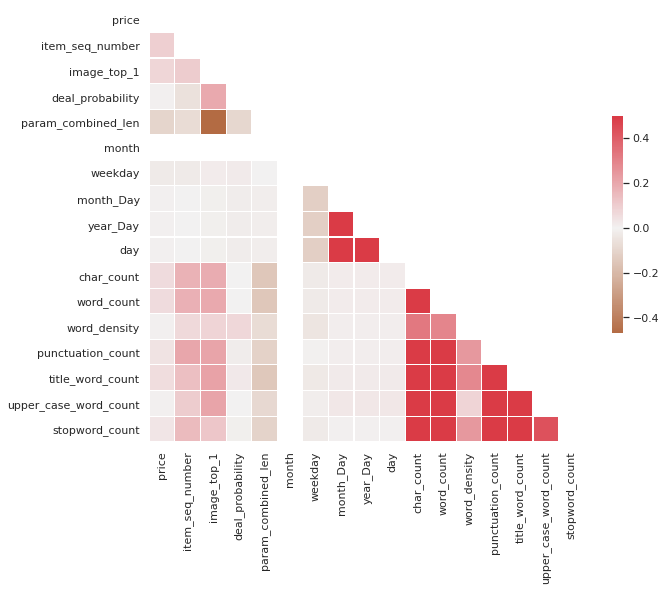

In [70]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(30, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5});

## <a id='7-2'>7.2 Venn Diagram (features comuns nos dados de treino e teste)</a>

* **A Venn diagram uses overlapping circles or other shapes to illustrate the logical relationships between two or more sets of items. 
<br> Serve to visualize how the items are similar and different.**

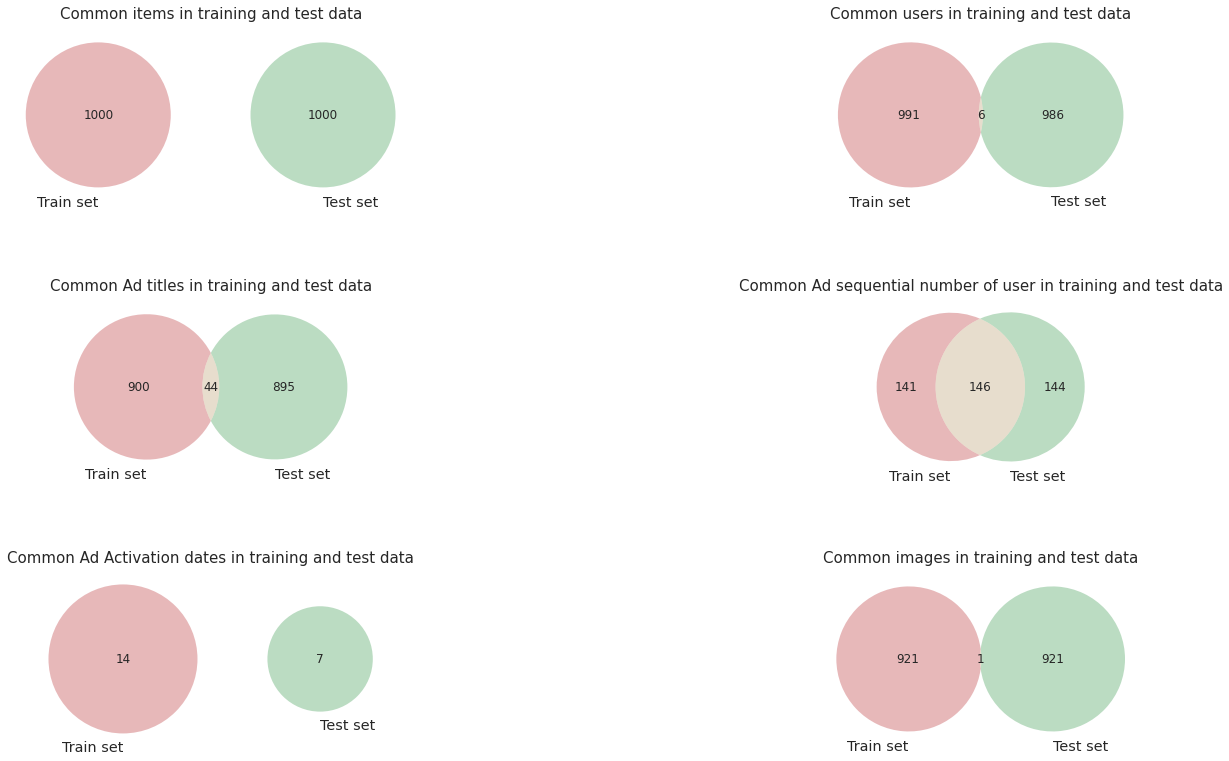

In [95]:
plt.figure(figsize=(23,13))

plt.subplot(321)
venn2([set(train.item_id.unique()), set(test.item_id.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common items in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(322)
venn2([set(train.user_id.unique()), set(test.user_id.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common users in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(323)
venn2([set(train.title.unique()), set(test.title.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad titles in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(324)
venn2([set(train.item_seq_number.unique()), set(test.item_seq_number.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad sequential number of user in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(325)
venn2([set(train.activation_date.unique()), set(test.activation_date.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad Activation dates in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(326)
venn2([set(train.image.unique()), set(test.image.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common images in training and test data", fontsize=15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5,
                    top = 0.9)
plt.show()

* **Common items in training and test data :** 
* **Common users in training and test data :** 
* **CommonAd titles in training and test data :** 
* **CommonAd sequential number of users in training and test data :** 
* **CommonAd activation dates in training and test data :** 
* **Common images in training and test data :** 

## Final dataset

In [98]:
train.shape

(1000, 36)

In [100]:
train.columns.to_list()

['item_id',
 'user_id',
 'region',
 'city',
 'parent_category_name',
 'category_name',
 'param_1',
 'param_2',
 'param_3',
 'title',
 'description',
 'price',
 'item_seq_number',
 'activation_date',
 'user_type',
 'image',
 'image_top_1',
 'deal_probability',
 'region_english',
 'parent_category_name_english',
 'category_name_english',
 'param_combined',
 'param_combined_len',
 'month',
 'weekday',
 'month_Day',
 'year_Day',
 'day',
 'char_count',
 'word_count',
 'word_density',
 'punctuation_count',
 'title_word_count',
 'upper_case_word_count',
 'stopword_count',
 'price_log']

In [96]:
train.head()

item_id       user_id  region  city  \
activation_date                                             
2017-03-28       b912c3c6a6ad  e00f8ff2eaf9      19    81   
2017-03-26       2dac0150717d  39aeb48f0017      17   217   
2017-03-20       ba83aefab5dc  91e2f88dd6e3      16   213   
2017-03-25       02996f1dd2ea  bf5cccea572d      21   163   
2017-03-16       7c90be56d2ab  ef50846afc0b       4    51   

                 parent_category_name  category_name  param_1  param_2  \
activation_date                                                          
2017-03-28                          4             41      122       25   
2017-03-26                          2             22       59       25   
2017-03-20                          0              2       31       25   
2017-03-25                          4             41       18       25   
2017-03-16                          6              0      139       32   

                 param_3                  title  ... year_Day  day  \
activation_date                                  ...                 
2017-03-28           112  Кокоби(кокон для сна)  ...       87   28   
2017-03-26           112      Стойка для Одежды  ...       85   26   
2017-03-20           112         Philips bluray  ...       79   20   
2017-03-25           112             Автокресло  ...       84   25   
2017-03-16            13         ВАЗ 2110, 2003  ...       75   16   

                 char_count word_count  word_density punctuation_count  \
activation_date                                                          
2017-03-28               58          7         7.250                 2   
2017-03-26               41          7         5.125                 3   
2017-03-20               99         17         5.500                 5   
2017-03-25               22          3         5.500                 1   
2017-03-16               24          4         4.800                 1   

                 title_word_count  upper_case_word_count stopword_count  \
activation_date                                                           
2017-03-28                      1                      0              1   
2017-03-26                      2                      1              3   
2017-03-20                      3                      2              4   
2017-03-25                      1                      0              0   
2017-03-16                      1                      0              2   

                 price_log  
activation_date             
2017-03-28        5.993961  
2017-03-26        8.006701  
2017-03-20        8.294300  
2017-03-25        7.696667  
2017-03-16       10.596660  

[5 rows x 36 columns]

# <a id='bsc'>8. Síntese</a>